# INTRODUCTION À L'APPRENTISSAGE SUPERVISÉ (Machine Learning)

## Introduction

Dans une première partie nous allons aborder succintement les notions mathématiques et informatiques nécessaires pour une bonne compréhension des explications données sur l'apprentissage supervisé qui fera l'objet de la deuxième partie de cet enseignement. 

# PARTIE I

## Les fonctions de plusieurs variables

**Exemple en physique:**

$$v(x, t) = \dfrac{x}{t}$$

$x$ indique la distance parcourue par un objet et $t$ la durée de déplacement. $v$ est alors une fonction à deux variables réelles. Les deux variables sont $x$ et $t$. Il est important de noter que les deux variables sont **indépendantes**.

$v : \mathbb{R^+}\times\mathbb{R^+}\longrightarrow\mathbb{R^+}$<br>
$v : (x, t)\mapsto v(x, t) = \dfrac{x}{t}$

** Définition :**

Soit $(x, y)\in E \subset \mathbb{R}^2$

On appelle fonction de deux variables définie sur $E$, le procédé qui consiste à associer à chaque couple $(x, y)$ de $E$ un réel unique. On note généralement : $f(x, y) = z$

On peut se représenter z comme une *altitude* définie en chaque point du plan de base.

### Représentation graphique d'une fonction à deux variables dans un repère en trois dimensions

**Définition : **

Soit $f$ , une fonction de deux variables définie sur un domaine $E$. L’ensemble des points de coordonnées $(x, y, z)$ avec $z = f (x, y)$, pour $(x, y)$ parcourant $E$ est appelé **surface d’équation** $z = f (x, y)$

Pour représenter une fonction de $\mathbb{R}^2$ dans $\mathbb{R}$, on représente les points de coordonnées $M(x, y, f (x, y))$.

**Exemple :** Représentation de la surface d'équation : $\quad z = x^2 + y^2$

In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

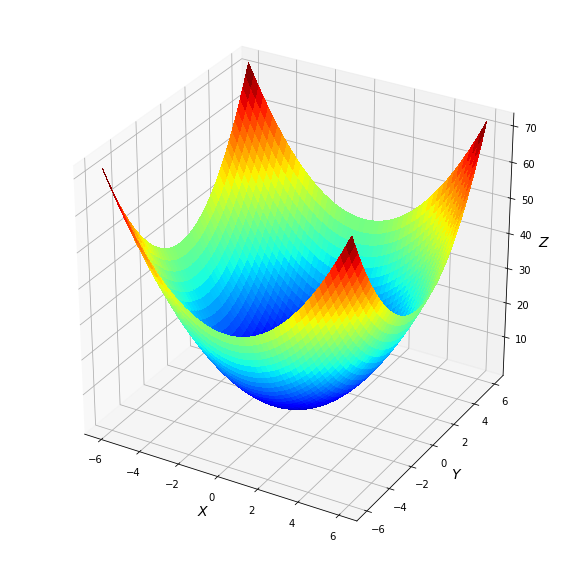

In [2]:
# La fonction à représenter
def f(x, y):
    return x ** 2 + y ** 2

def affiche_3DXY(f, ddx, ddy):
    # L'intervalle de définition pour chaque variable
    x = np.linspace(ddx[0], ddx[1], 50)
    y = np.linspace(ddy[0], ddy[1], 50)

    # Calcul des valeurs de z = f(x, y)
    X, Y = np.meshgrid(x, y)
    Z    = f(X, Y)

    # Paramètres de l'affichage 3D de la surface
    plt.figure(figsize=(10,10))
    ax   = plt.axes(projection='3d')
    ax.set_xlabel('$X$',fontsize=14);
    ax.set_ylabel('$Y$',fontsize=14);
    ax.set_zlabel('$Z$',fontsize=14);
    surf =  ax.plot_surface(X, Y, Z, cmap='jet',
                       linewidth=0, antialiased=False)

    # Affichage de la surface
    plt.show()
    
affiche_3DXY(f, [-6, 6], [-6, 6])

## Dérivées partielles, notations

La dérivation d’une fonction d’une variable peut être généralisée. Les dérivées partielles d’une fonction de deux variables x et y se calculent de la façon suivante :

* par rapport à x : on considère que y est constant et on dérive la fonction comme fonction d’une variable x.
* par rapport à y : on considère que x est constant et on dérive par rapport à y.

La dérivée partielle de $f$ par rapport à $x$ se note $\dfrac{\partial f}{\partial x}$, la dérivée partielle de $f$ par rapport à $y$ se note $\dfrac{\partial f}{\partial y}$

**Exercices : ** Calculer les dérivées partielles $\dfrac{\partial f}{\partial x}(x, y)$ et $\dfrac{\partial f}{\partial y}(x, y)$ des fonctions suivantes

* Soit $f_1$ la fonction définie sur $\mathbb{R}^2$ par $f_1(x, y) = x^2 + y^2$
* Soit $f_2$ la fonction définie sur $\mathbb{R}^2$ par $f_2(x, y) = x^3 e^y$
* Soit $f_3$ la fonction définie sur $\mathbb{R}^2$ \ ${(0,0)}$ par $f_3(x, y) = \dfrac{x^3y^3}{x^2+y^2}$

On rappelle la loi de Boyle Mariotte, valable pour une mole de gaz parfait : $P V = RT $, où $P$ désigne la pression du gaz, $V$ son volume, $R$ la constante des gaz parfaits et $T$ la température du milieu. La pression P est donc une fonction des deux variables T et V

* Calculer $\dfrac{\partial P}{\partial T}(T, V)$ et $\dfrac{\partial P}{\partial V}(T, V)$
* Même question si l’on considère à présent la relation de Van der Waals, avec les mêmes conventions que précédemment, et avec a et b réels :

$$ \left(P+\dfrac{a}{V^2}\right)(V-b) = RT$$

## Gradient d'une fonction

On appelle gradient d'une fonction $f$ en un point $M$, et on le note $\vec{\nabla}\,f$, le vecteur dont les composantes sont les dérivées partielles de $f$ calculées au point $M$

Pour une fonction à deux variables on écrit :

$\vec{\nabla} f : (x, y)\mapsto (f_x'(x, y), f_y'(x, y))$

$$\vec{\nabla}\,f (x, y)= \begin{pmatrix} \dfrac{\partial f}{\partial x}(x, y)\\ \dfrac{\partial f}{\partial y}(x, y)\end{pmatrix}$$

**À faire : ** Quel est le gradient des fonctions suivantes au point $(2,5)$  

$f: (x, y)\mapsto x^2 + y^2 + xy$

$f: (x, y)\mapsto xe^y - 2xy$

### Quel sens donner au gradient ?

Pour une fonction de plusieurs variables, la direction du vecteur gradient correspond à la ligne de plus grande pente au point considéré, c’est la direction qu’il faut suivre en partant du point pour avoir le plus grand taux de variation de $f$.

La norme du gradient donne la pente de la surface (plus grande pente) au point considéré.

Les points critiques d’une fonction $f$ de plusieurs variables sont les points où son gradient s’annule

### Courbes de niveaux

**Définition : **

Soit $f$ une fonction définie sur un ouvert $E$ de $\mathbb{R}^2$. On appelle courbe de niveau de $f$ associée au réel $k$ l'ensemble des points $(x,y)$ de $E$ vérifiant $f(x,y)=k$. Cet ensemble est éventuellement vide.

**Exemples : **

In [3]:
# La fonction à représenter
def f(x, y):
    return x ** 3

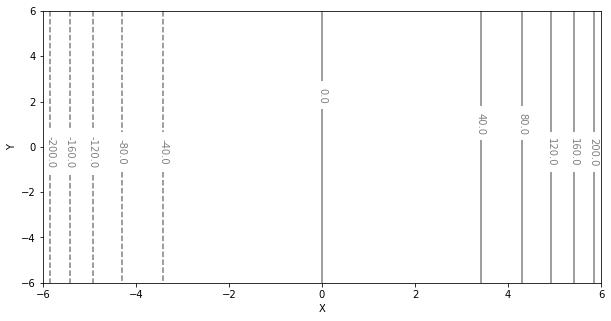

In [5]:
def courbes_niveaux(f, ddx, ddy, dim):
    # L'intervalle de définition pour chaque variable
    x = np.linspace(ddx[0], ddx[1], 30)
    y = np.linspace(ddy[0], ddy[1], 30)

    # Calcul des valeurs de z = f(x, y)
    X, Y = np.meshgrid(x, y)
    Z    = f(X, Y)

    # Paramètres de l'affichage 3D de la surface
    plt.figure(figsize=(dim[0],dim[1]))
    
    #Les courbes de niveaux
    cont = plt.contour(X,Y, Z, 10, colors='grey')
    plt.clabel(cont, inline=1,fontsize=10,fmt='%3.1f')
    
    # Affichage de la surface
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    
courbes_niveaux(f, [-6, 6], [-6, 6], (10, 5))

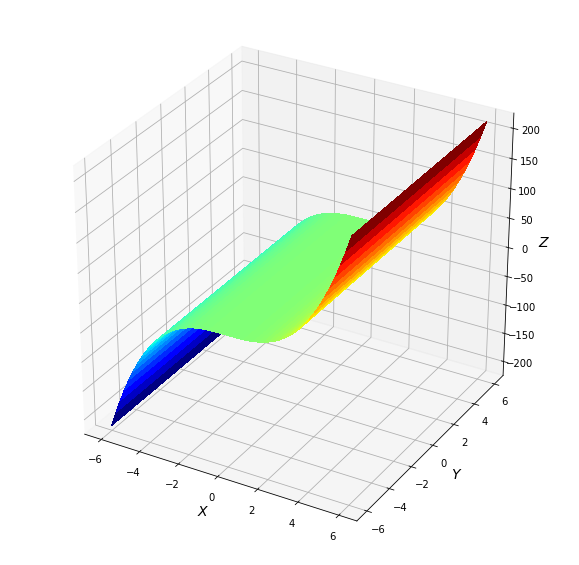

In [6]:
affiche_3DXY(f, [-6, 6], [-6, 6])

**À faire** 
1. En comparant le graphique des courbes de niveaux et celui de la représentation 3D, expliquer pourquoi les courbes de niveaux ne sont-elles pas régulièrement espacées. Un dessin sur papier est conseillé...
2. Choisir une courbe de niveaux et calculer le gradient en un point de cette courbe de niveaux. Conclure quand à la direction du gradient par rapport à cette courbe de niveaux

**Des exemples plus compliqués**

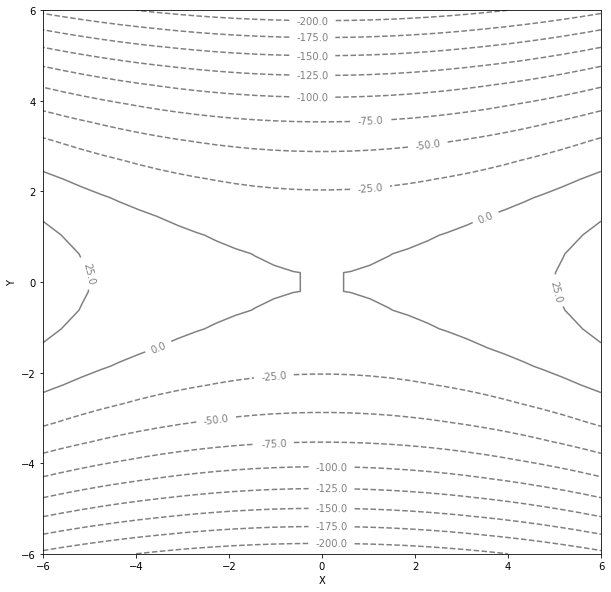

In [7]:
def f(x, y):
    return x**2 - 6*y**2

courbes_niveaux(f, [-6, 6], [-6, 6], (10,10))

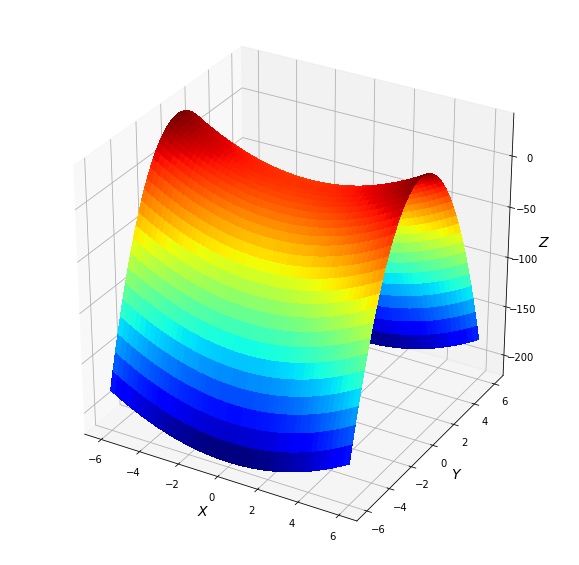

In [8]:
affiche_3DXY(f, [-6, 6], [-6, 6])

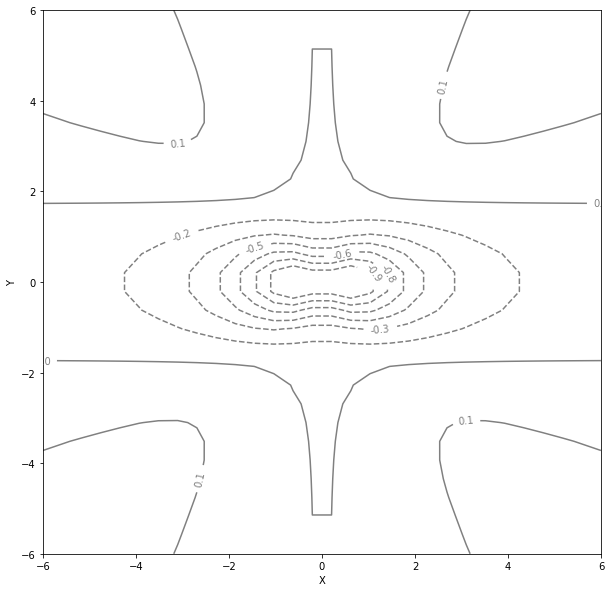

In [9]:
def f(x, y):
    return ((x**2-1) + (y**2-4) + (x**2-1)*(y**2-4))/(x**2+y**2+1)**2

courbes_niveaux(f, [-6, 6], [-6, 6], (10,10))

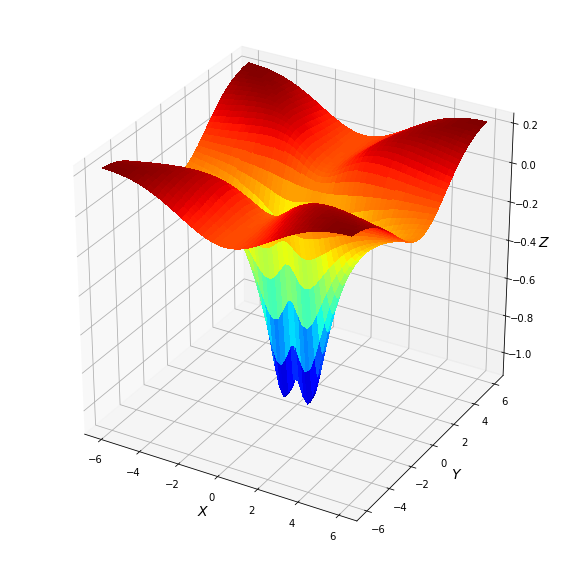

In [10]:
affiche_3DXY(f, [-6, 6], [-6, 6])

### Descente de gradient

La **descente de gradient** est une méthode d'analyse numérique permettant dans certaines conditions de déterminer le minimum d'une fonction. Prenons un exemple de fonction à une variable pour commencer.

Soit $\quad f : x\mapsto x^4 - 5x^3 - 3x^2 + 20x - 2$ avec $x\in\mathbb{R}$

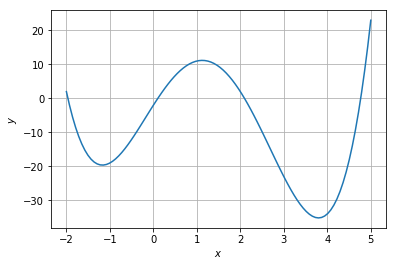

In [11]:
# La fonction à représenter
def f(x):
    return x**4 - 5*x**3 - 3*x**2 + 20*x - 2

# L'intervalle de définition
x = np.linspace(-2, 5, 100)
y = f(x)

#les points
plt.plot(x,y)

#affichage
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.grid()
plt.show()

L'idée est de construire une suite de valeur notée $(x_n)_{n\in\mathbb{N}}$ nous permettant d'approcher les points critiques de $f$ : $\nabla f(x) = 0$.

$$x_{n+1} = x_n - \eta\, \nabla f(x) = x_n - \eta \dfrac{\partial f}{\partial x}(x)$$
$$\boxed{x_{n+1} = x_n - \eta\, f'(x)}$$

Le critère d'arrêt est donné par $\Delta x = |x_{n+1} - x_n| <= \varepsilon$, ($\varepsilon\in\mathbb{R}$) 

**Exemple : **

$f'(x) = 4x^3-15x^2-6x+20$

Soient : $\eta = 0.001$ et $x_0=5$

**À faire : ** 

1. Écrire une fonction $x\_suivant(f, x, pas)$ qui prend en argument la fonction dérivée, la valeur de $x_n$, le pas ($\eta$) et qui renvoie $x_{n+1}$ 
2. En utilisant les données ci-dessus, calculer la valeur de : $x_5$, que se passe-t-il ?
3. Dessiner le cas ou $x_0=5$ et $\eta = 0.02$ pour les 3 premiers itérés
4. Que se passe-t-il si on augmente encore la valeur de $\eta$ ?
5. Conclure quant à la valeur du pas.

### Une implémentation Python de l'algorithme de gradient à pas fixe.

In [12]:
def f(x):
    return x**4 - 5*x**3 - 3*x**2 + 20*x - 2

def gradf(x):
    return 4*x**3 - 15*x**2 - 6*x + 20

def descente(x, pas):
    return x - pas*gradf(x)

# les données
x0      = 5
pas     = 0.001
epsilon = 1e-12

# Initialisation du critère d'arrêt
prec   = x0
deltaX = descente(prec, pas) - prec
# Nombre d'itérations pour atteindre un minimum de f
compt  = 0

while abs(deltaX) > epsilon:
    suiv   = descente(prec, pas)
    deltaX = suiv-prec
    prec   = suiv
    compt += 1

# Affichage des résultats
print(compt, f(suiv))
        

446 -35.16647271868813


**À faire : ** Écrire une fonction $descente\_gradient$ dont vous choisirez les paramètres renvoyant un minimum d'une fonction donnée.

# PARTIE II

## Apprentissage automatique supervisé et préparation des données

L'apprentissage automatique est la science qui permet de programmer un ordinateur pour qu'il apprenne à partir des données dans le but de faire des prédictions sur de nouvelles données.

Dans l'apprentissage supervisé ont peux distinguer deux étapes : 
* une phase d'apprentissage avec les **variables explicatives** encore appelées **données d'entrainement** comportant les données à étudier et les solutions désirées (**etiquettes**).
* une phase de **prédiction** qui consiste à prédire l'étiquette d'une nouvelle donnée

**Remarque :** **Features** en anglais ou variables explicatives en français sont les variables accessibles, que l'on peut mesurer. 

Quelques exemples classiques d'apprentissage supervisé : 
* **La classification :** on peut imaginer mesurer une température et une pression et vouloir déterminer l'état solide, liquide ou gazeux de l'espèce chimique considérée, ou bien encore décider des e-mails à conserver ou à rejeter comme spam.
* **La modélisation :** un exemple simple est la regression linéaire que nous étudierons à la fin de cette deuxième partie.

## Apprentissage avec Perceptron

<img src="images/perceptron.png">

Soit $f$ la fonction de transfert suivante : 
$$
\forall x\in\mathbb{R},\ f_H: x\mapsto \left\{
\begin{array}{cccl}
0 & \text{si} & x < 0 \\
1 & \text{si} & x \geq 0 \\
\end{array}\right.
$$

**Perceptron : ** L'objectif est d'implanter un perceptron à seuil (neurone simple à seuil) pour résoudre les problèmes de tri entre deux **classes** (ensembles d'élement) **linéairements séparables**. Un cas typique de classification.

### Fonctionnement du neuronne artificiel

** Description**


L'unique fonction de ce neurone est de fournir une sortie égale à $1$ ou $0$, on parle alors de neurone activé pour la valeur $1$ et de neurone non activé pour la valeur $0$. 

Pour cela on effectue la somme $S = b + \sum\limits_{i=1}^n x_i\,\omega_i$, avec $b$ le poids associé à l'entrée de biais du neurone artificiel. La valeur de l'entrée de biais est fixée à 1. Connaissant cette somme on décide d'activer ou non notre neurone en fonction d'un **seuil d'activation** $\theta$, fixé au préalable. 

Pour décider de l'activation de notre neurone on peut utiliser la fonction de transfert HeavySide notée $f_H$ de type seuil qui renvoie

| heaviside :$\hphantom{000000000000000000000000000}$| Graphique :|
| :--- | :--- |
|$$ y_H=f_H(S)=\left\{\begin{array}{cccl}0 & \text{si} & S < 0 \\1 & \text{si} & S \geq 0 \\ \end{array}\right.$$|<img src="images/heavi0.png" width="200">|

$$y_H = f_H(S) = f_H(b + \sum\limits_{i=1}^n x_i\,\omega_i)$$

**Remarques : ** 
* Soient $W$ et $X$ les vecteurs associés aux poids et aux valeurs d'entrées alors on peut écrire que : $$S = b + \sum\limits_{i=1}^n x_i\,\omega_i = b + W^TX$$
* La valeur seuil de la fonction Heaviside est à définir en fonction des besoins

| heaviside :$\hphantom{000000000000000000000000}$| Graphique :|
| :--- | :--- |
|$$ y_H=\left\{\begin{array}{cccl}0 & \text{si} & S < \theta \\1 & \text{si} & S \geq \theta \\ \end{array}\right.$$|<img src="images/heavi1.png" width="250">|

**L'apprentissage supervisé ou comment permettre à l'ordinateur d'entrer dans un processus d'apprentissage ? **


L'algorithme consiste à donner des valeurs d'apprentissage au perceptron et comparer la sortie de la fonction Heaviside notée $y_H$ à la sortie attendue que l'on peut lire dans les valeurs d'apprentissage notée $y_v$ (**étiquette**).

La différence $\Delta y = y_v - y_H$, introduit une notion d'erreur permettant par la suite de corriger (ou pas) les poids attribués à chaque  valeur d'entrée du neurone
* Si $\Delta y \neq 0$, on adapte les poids $\omega_i$ et $b$ en les incrémentant ou décrémentant d'un pas d'apprentissage noté $\eta$ fixé arbitrairement ($\eta$ un réel tel que $\eta\in]\,0, 1]$), l'ajustement se fait de la manière suivante : 
    - $\omega_{i}= \omega_i + x_i*\eta*\Delta y$
    - $b = b + \eta*\Delta y$
* On répète ces étapes $n$ fois avec le même jeu de données d'entrée et de sortie. 
* Plus $n$ est grand plus le perceptron apprend. 

### Minimisation de l'erreur : mise à jour des poids


Afin de mesurer l’erreur commise sur l’ensemble d’un jeu de données, il est nécessaire de se fixer une fonction de perte
 qui mesure le coût d’une erreur lors de la prédiction d’un exemple.Pour cela nous allons nous intéresser à la fonction de perte liée à l'erreur quadratique 


$$E(y_v, f_H(b + \sum\limits_{i=1}^n x_i\,\omega_i)) = \dfrac{1}{2}(y_v-f_H(b + \sum\limits_{i=1}^n x_i\,\omega_i))^2=\dfrac{1}{2}(y_v-y_s)^2$$


La mise à jour des poids revient à minimiser la valeur de sortie de la fonction d'erreur que nous pouvons approcher grâce à la méthode de **descente de gradient**. Cet ajustement des poids se fera pour chaque n-uplet de valeurs en entrée du perceptron.


$$\Delta \omega = -\eta\nabla E$$


$$\begin{pmatrix} \Delta\omega_1\\ \Delta\omega_2\\ \dots\\ \Delta\omega_n\end{pmatrix}= -\eta \begin{pmatrix} \dfrac{\partial E}{\partial \omega_1}\\ \dfrac{\partial E}{\partial \omega_2}\\ \dots\\ \dfrac{\partial E}{\partial \omega_n}\end{pmatrix}$$

Commençons par évaluer $\dfrac{\partial E}{\partial \omega_i}$ pour une fonction d'activation quelconque de classe $\mathcal{C}^1$ notée $f$.


$E = \dfrac{1}{2}(y_v-y_s)^2 = \dfrac{1}{2}\left(y_v-f\left(\sum\limits_{i=0}^n x_i\,\omega_i\right)\right)^2\quad\text{Pour simplifier les notations le biais est inclu dans la somme des }\omega_ix_i$


$\dfrac{\partial E}{\partial \omega_i} = 2\times\dfrac{1}{2}\left(y_v-f\left(\sum\limits_{i=0}^n x_i\,\omega_i\right)\right)\times\dfrac{\partial }{\partial \omega_i}\left(y_v-f\left(\sum\limits_{i=0}^n x_i\,\omega_i\right)\right)$


$\dfrac{\partial E}{\partial \omega_i} = (y_v-y_s)\times\dfrac{\partial }{\partial \omega_i}\left(f\left(\sum\limits_{i=0}^n x_i\,\omega_i\right)\right) \quad\text{avec}\quad (f\circ g)'(x) = f'(g(x))g'(x)$


$\dfrac{\partial E}{\partial \omega_i} = (y_v - y_s)\ f'\left(\sum\limits_{i=0}^n x_i\omega_i\right)\,x_i$


$\Delta \omega_i = -\eta\,(y_v - y_s)\,x_i\ f'\left(\sum\limits_{i=0}^n x_i\omega_i\right)$


$$\boxed{\Delta \omega_i = \eta\,(y_s - y_v)\,x_i\ f'\left(\sum\limits_{i=0}^n x_i\omega_i\right)}$$

Nous obtenons une relation de mise à jour des poids pour un n-uplet donné en entrée du perceptron. Pour le biais il suffit de fixer le $x_i$ correspondant à $1$ ou $-1$ suivant les cas.

**Remarque : ** La fonction HeaviSide est constante par morceaux ($y=0$ ou $y=1$) donc le terme $f'\left(\sum\limits_{i=0}^n x_i\omega_i\right)$ peut être remplacé par la valeur 1 ou -1.

### Exemple 

Des données purement numériques avec une zone d'activité occupée par les points rouges et une zone d'activité occupée par les points bleus. Une fois l'apprentissage terminé tout nouveau point placé sur la carte doit pouvoir faire l'objet d'une prédiction d'appartenance à la zone rouge ou bleue.

In [13]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

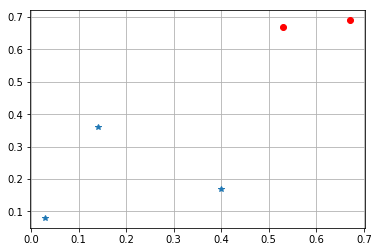

In [14]:
x1, y1 = [0.03, 0.14, 0.4], [0.08, 0.36, 0.17]
x2, y2 = [0.67, 0.53], [0.69, 0.67]
plt.grid()
plt.plot(x1, y1, '*')
plt.plot(x2, y2, 'ro')
plt.show()

Pour cet exemple l'idée est de réduire à son strict minimum le nombre de variables explicatives. Cela permet d'observer le fonctionnement du neurone de notre perceptron dans un plan.


La **Table d'apprentissage** correspondante aux **variables explicatives** qui serviront à l'entraînement de notre neurone. 


\begin{array}{|c|c|c|}\hline 
x_1 & x_2 & y_v\\\hline 
0.03 & 0.08 & 1\\\hline 
0.14 & 0.36 & 1\\\hline 
0.4 &  0.17 & 1\\\hline
0.53 & 0.67 & 0\\\hline 
0.67 & 0.69 & 0\\\hline
\end{array}

Soit $b = 0.5$, $\forall i\in\mathbb{N},\, \omega_i=0$ et $\eta = 0.2$

**Méthode : **
    
* On lit un n-uplet 
* On calcul sa sortie
* On met les poids à jour si nécessaire : $\omega_{i}= \omega_i + \eta*\Delta y*x_i$ et $\quad b = b + \eta*\Delta y$
* On recommence au début tant que l'apprentissage n'est pas satisfaisant 

**À faire : ** Compléter le tableau suivant : 

\begin{array}{|c|c|c|c|c|c|c|c|}\hline
\text{Itérations} & \text{n-uplet} & b & \omega_1 & \omega_2 & S = b +\sum\limits_{i=1}^n x_i\,\omega_i & y_H = f_H(S) & Y_v & \Delta y \\\hline
1 & (0.03, 0.08) & 0.5 &  0 & 0 & 0.5 & 1 & 1 & 0\\\hline
2 &  &  &   &  &  &  &  & \\\hline
3 &  &  &   &  &  &  &  & \\\hline
4 &  &  &   &  &  &  &  & \\\hline
5 &  &  &   &  &  &  &  & \\\hline
\end{array}

**Équation de la séparatrice : ** $b +\sum\limits_{i=1}^n \omega_i\, x_i = 0$


$$\omega_1x_1 + \omega_2x_2 + b = 0 \quad\text{ssi}\quad x_2 = -\frac{1}{\omega_2}(\omega_1x_1 + b)$$


Si on remplace par les valeurs que l'on a trouvé à l'itération 5 (on est pas sûr que ce soit fini) on peut écrire : 

$$x_2 = \frac{1}{0.106}(-0.134\,x_1 + 0.3)$$

#### Représentation graphique de la séparatrice

**À faire : ** Compléter le code suivant pour obtenir une représentation graphique des valeurs d'apprentissage et de la séparatrice

In [ ]:
# A compléter avec la fonction separatrice

x = np.linspace(0,0.6,100)
y = separatrice(x)

plt.grid()
plt.plot(x, y)
plt.plot(x1, y1, '*')
plt.plot(x2, y2, 'ro')
plt.show()

### Implémentation du perceptron

In [15]:
# La fonction de transfert
def heavyside(x):
    if x < 0:
        return 0
    return 1

In [16]:
def perceptron(f, e, n, eta, b, data):
    '''
    f    -> function : fonction de transfert
    e    -> int      : nombre d'entrées du perceptron
    n    -> int      : nombre d'itérations pour l'apprentissage
    eta  -> int      : le pas d'apprentissage (arbitraire : 0 < eta <= 1)
    b    -> int      : poids du biais
    data -> list     : les données que l'on cherche à prédire
    '''
    errors = []                  # liste des erreurs à la prédiction
    w = np.zeros(e)              # Tous les poids à zéro
    w[-1] = b                    # poids du biais
    fin = len(data)
    for i in range(n):
        if i >= fin:
            x, s = data[i%fin]   # lecture circulaire de la table d'apprentissage
        else:
            x, s = data[i]
        x = np.array(x)
        result = np.dot(w, x)    # somme pondérée
        error = s - f(result)    # différence entre prédiction et résultat
        errors.append(error)
        w += eta * error * x     # mise à jour des poids (biais compris)
    return w, errors

In [17]:
# Les données pour l'apprentissage du perceptron

data = [
    ([0.03, 0.08, 1], 1),
    ([0.14, 0.36, 1], 1),
    ([0.40, 0.17, 1], 1),
    ([0.53, 0.67, 1], 0),
    ([0.67, 0.69, 1], 0),
]

In [18]:
# Les tests de vérification

w, errors = perceptron(heavyside, 3, 20, 0.2, 0.5,  data)
for x, _ in data:
    result = np.dot(x, w)
    print("{}: {:6.3f} -> {}".format(np.array(x), result, heavyside(result)))

[0.03 0.08 1.  ]:  0.270 -> 1
[0.14 0.36 1.  ]:  0.165 -> 1
[0.4  0.17 1.  ]:  0.139 -> 1
[0.53 0.67 1.  ]: -0.029 -> 0
[0.67 0.69 1.  ]: -0.075 -> 0


**Représentation graphique de la séparatrice :**

Dans cette simulation je fixe plusieurs valeurs pour le nombre d'itération $n$ d'apprentissage. Cela permet d'observer comment se déplace la séparatrice dans le plan des variables d'apprentissage.

**À faire : **
1. La séparatrice est-elle unique ?
2. quels sont les paramètres qui influencent la position de la séparatrice ?
3. Quelle(s) solution(s) peut-on imaginer pour améliorer le taux de réussite des prédictions ?

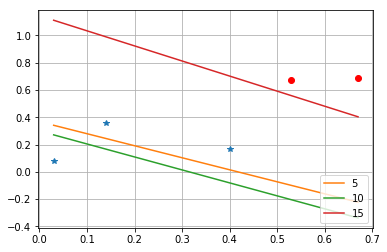

In [19]:
x = np.linspace(min(x1), max(x2), 100)
def separator(x):
    return -(w[0]/w[1]*x + w[2]/w[1])

plt.grid()
plt.plot(x1, y1, '*')
plt.plot(x2, y2, 'ro')

for n in [5, 10, 15]:
    w, errors = perceptron(heavyside, 3, n, 0.2, 0.5, data)
    y = separator(x)
    plt.plot(x, y, label = str(n))
    
plt.legend(loc=4)   
plt.show()

## Projet : Regression linéaire avec le perceptron (4H)

Soit une série de points dont on connait les coordonnées : 

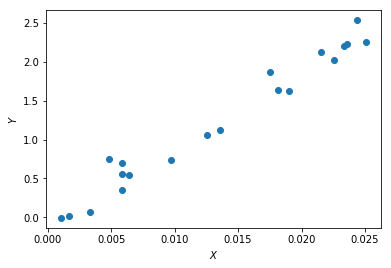

In [20]:
k = 100
X = [np.random.uniform(1e-3, 3e-2, 20), np.ones(20)]
Y = k*X[0]+np.random.uniform(-0.3, 0.3, 20)
plt.plot(X[0],Y, 'o')
plt.ylabel("$Y$")
plt.xlabel("$X$")
plt.show()

**Objectif : ** Tracer une régression permettant de modéliser le nuage de points.

Pour cela on dispose d'un neurone avec :

* Une seule entrée en plus du biais : $x$
* Une fonction d'activation linéaire : $f(x) = x$
* La sortie attendue : $y$ (dans laquelle j'ai ajouté un peu de bruit)

On peut accéder aux données d'apprentissage avec l'instruction Python suivante : 

In [ ]:
print(X[0])

1. Quelles sont les valeurs d'apprentissage attendues pour les différentes valeurs de X[0] ?
2. Modifier le code précédent pour obtenir seulement 5 points sur le graphqiue.
3. Tracer un tableau permettant d'observer l'évolution lors de l'apprentissage des grandeurs caractéristiques de notre neurone sur les 3 premiers itérés.
4. Écrire un programme permettant d'afficher le résultat de l'apprentissage supervisé du neurone pour les 5 points.
5. Combien d'itérations sont nécessaires pour obtenir une régression qui semble correcte ?
6. Modifier votre code pour afficher le résultat de l'apprentissage supervisé du neurone avec un nuage de points quelconque.

### Regression linéaire avec numpy

In [ ]:
z  =  np.polyfit(X[0], Y, 1)  # 1 pour le plus haut degré du polynôme
p  =  np.poly1d (z)
print(p)                      # affiche le polynôme

À l'aide du code ci-dessus comparer la droite resultant de l'apprentissage du neurone et celle calculée par numpy.

christophe.casseau@ensam.eu